# Adding multiple chips to wafer

In [191]:

import os
import phidl.geometry as pg
from phidl import Device, quickplot as qp

# Create a blank wafer layout
wafer = Device("wafer_layout")

# Add wafer outline (2-inch wafer = 5.08 cm = 50,800 um diameter)
wafer_radius = 45000   # um
wafer << pg.circle(radius=wafer_radius, layer=0)


DeviceReference (parent Device "circle", ports [], origin (0, 0), rotation 0, x_reflection False)

### Qubit

In [192]:
def add_qubit_bbox_and_negative_mask(wafer, qubit_chip_obj, qubit_chip_width, idx, xpos_offset, ypos_offset):
    qubit_length = 16500  # Example length for qubit chip, adjust as needed
    test_structure_length_down = 9850
    test_structure_length_up = 2100

    xpos = xpos_offset + (idx * qubit_chip_width)
    ypos = ypos_offset

    qubit_bbox = pg.rectangle(size=(qubit_chip_width, qubit_length), layer=13)
    wafer << qubit_bbox.move((xpos - 200, ypos - 200 + test_structure_length_down))

    test_structure_bbox = pg.rectangle(size=(qubit_chip_width, test_structure_length_down), layer=13)
    wafer << test_structure_bbox.move((xpos - 200, ypos - 200))

    qubit_chip_bbox = pg.rectangle(size=(qubit_chip_width, qubit_length + test_structure_length_down + test_structure_length_up), layer=14)
    qubit_chip_bbox.move((-200, -200))

    qubit_negative = pg.boolean(A=qubit_chip_bbox, B=qubit_chip_obj, operation='xor', layer=5)
    wafer << qubit_negative.move((xpos, ypos))
    # wafer<< qubit_chip_obj.move((xpos, ypos))

    return wafer


Importing C:\Users\eeshg\Documents\multimode_sims\Design\coupler\designs_dxf\TESTINGQUBIT1113-C1A.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\coupler\designs_dxf\TESTINGQUBIT1113-C1B.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\coupler\designs_dxf\TESTINGQUBIT1113-C1C.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\coupler\designs_dxf\TESTINGQUBIT1113-C1D.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\coupler\designs_dxf\TESTINGQUBIT1113-C1E.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\coupler\designs_dxf\TESTINGQUBIT1113-C1F.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\coupler\designs_dxf\TESTINGQUBIT1113-C1G.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\coupler\designs_dxf\TESTINGQUBIT1113-C1H.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\coupler\designs_dxf\TESTINGQUBIT1113-C1I.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\coupler\designs_dxf\TESTI

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


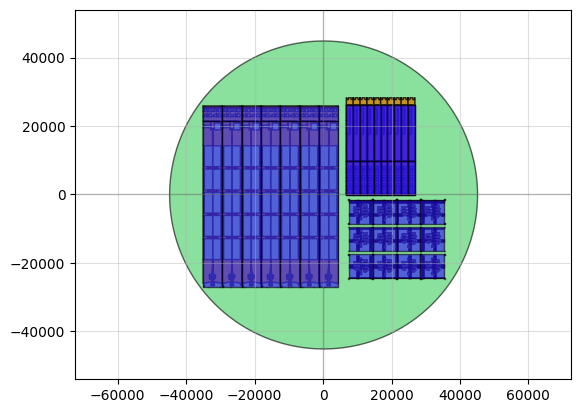

In [ ]:

# Qubits 
# Define path to DXF file to import
qubit_chip_width = 2000 # um 
# path = r"C:\Users\eeshg\Documents\multimode_sims\Design\coupler"  # <-- UPDATE THIS
path = ''
dxf_files = ['C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGQUBIT1113-C1A.dxf',
 'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGQUBIT1113-C1B.dxf',
 'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGQUBIT1113-C1C.dxf',
 'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGQUBIT1113-C1D.dxf',
 'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGQUBIT1113-C1E.dxf',
 'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGQUBIT1113-C1F.dxf',
 'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGQUBIT1113-C1G.dxf',
 'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGQUBIT1113-C1H.dxf',
 'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGQUBIT1113-C1I.dxf',
 'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGQUBIT1113-C1J.dxf']

# dxf_file = ['C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGQUBIT1113_JUNC_-C1A.dxf',
#  'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGQUBIT1113_JUNC_-C1B.dxf',
#  'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGQUBIT1113_JUNC_-C1C.dxf',
#  'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGQUBIT1113_JUNC_-C1D.dxf',
#  'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGQUBIT1113_JUNC_-C1E.dxf',
#  'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGQUBIT1113_JUNC_-C1F.dxf',
#  'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGQUBIT1113_JUNC_-C1G.dxf',
#  'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGQUBIT1113_JUNC_-C1H.dxf',
#  'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGQUBIT1113_JUNC_-C1I.dxf',
#  'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGQUBIT1113_JUNC_-C1J.dxf']


# Import the GDS structure
for idx, file in enumerate(dxf_files):
    wafer, qubit_obj = add_dxf_chip_to_wafer(wafer, file, path, qubit_chip_width, idx, x_offset=7000, y_offset=0, add_bool=False)
    wafer = add_qubit_bbox_and_negative_mask(wafer, qubit_obj, qubit_chip_width, idx, xpos_offset=7000, ypos_offset=0)
# Save the resulting wafer layout
wafer.write_gds("wafer_with_imported_dxf.gds")

# Quick preview (optional)
qp(wafer)



### Coupler

In [194]:
#Make the following code into a function : add bounding boxes and return negative mas 
# it should take arguments wafer, coupler_chip_obj, coupler_width, idx
# and return the wafer with the negative mask added
def add_coupler_bbox_and_negative_mask(wafer, coupler_chip_obj, coupler_width, idx, xpos_offset,
                                       ypos_offset):
    coupler_length = 48500
    test_structure_length = 4500

    xpos = xpos_offset + (idx * coupler_width)
    ypos = ypos_offset

    coupler_bbox = pg.rectangle(size=(coupler_width, coupler_length), layer=13)
    wafer << coupler_bbox.move((xpos - 100, ypos - 100))

    test_structure_bbox = pg.rectangle(size=(coupler_width, test_structure_length), layer=13)
    wafer << test_structure_bbox.move((xpos - 100, ypos + coupler_length - 100))

    coupler_chip_bbox = pg.rectangle(size=(coupler_width, coupler_length + test_structure_length), layer=14)
    coupler_chip_bbox.move((-100, -100))

    coupler_negative = pg.boolean(A=coupler_chip_bbox, B=coupler_chip_obj, operation='xor', layer=5)
    wafer << coupler_negative.move((xpos, ypos))

    return wafer

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Importing C:\Users\eeshg\Documents\multimode_sims\Design\coupler\designs_dxf\TESTINGCOUPLER-C1A.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\coupler\designs_dxf\TESTINGCOUPLER-C1B.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\coupler\designs_dxf\TESTINGCOUPLER-C1C.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\coupler\designs_dxf\TESTINGCOUPLER-C1D.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\coupler\designs_dxf\TESTINGCOUPLER-C1E.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\coupler\designs_dxf\TESTINGCOUPLER-C1F.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\coupler\designs_dxf\TESTINGCOUPLER-C1G.gds


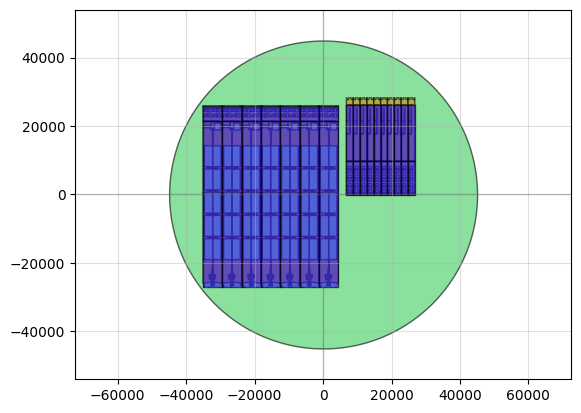

In [195]:
coupler_files =  ['C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGCOUPLER-C1A.dxf',
 'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGCOUPLER-C1B.dxf',
 'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGCOUPLER-C1C.dxf',
 'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGCOUPLER-C1D.dxf',
 'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGCOUPLER-C1E.dxf',
 'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGCOUPLER-C1F.dxf',
 'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\coupler\\designs_dxf\\TESTINGCOUPLER-C1G.dxf']
coupler_width = 5650
# Import the GDS structure
for idx, file in enumerate(coupler_files):
    wafer, coupler_chip_obj = add_dxf_chip_to_wafer(wafer, file, path, coupler_width, idx, x_offset=-35000, y_offset=-27000,
                                                    add_bool = False)

    wafer = add_coupler_bbox_and_negative_mask(wafer, coupler_chip_obj, coupler_width, idx, xpos_offset=-35000, ypos_offset=-27000)
qp(wafer)

### Adding coherence resonators

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


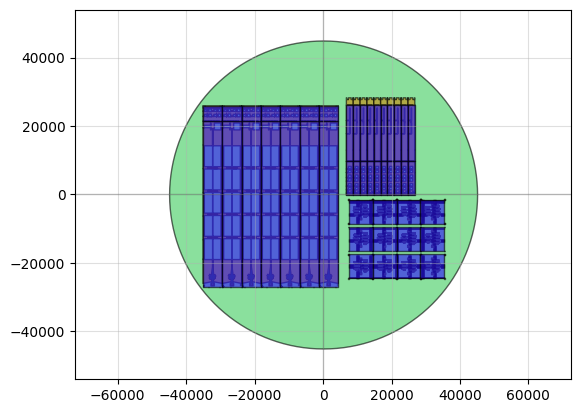

'wafer_with_imported_dxf.gds'

In [196]:
import numpy as np
import phidl.geometry as pg
import phidl.device_layout as pdl # Assuming Device or Cell objects might be from here
# import phidl.quickplot as qp

def add_coherence_resonators(
    wafer_device,
    x_offset,
    y_offset,
    num_resonators,
    resonator_gds="center_feedline_resonator_5.gds",
    bbox_size=7000,
    spacing=None
):
    if spacing is None:
        spacing = blank_params.size

    # Initialize arrays for X and Y coordinates
    blank_x_arr = np.array([-31000] * num_resonators)
    blank_y_arr = np.array([27000] * num_resonators)

    blank_x_arr = blank_x_arr - bbox_size / 2 + x_offset
    blank_y_arr = blank_y_arr - bbox_size / 2 + y_offset
    blank_x_arr = [blank_x_arr[i] + (i) * spacing for i in range(num_resonators)]

    for i in range(num_resonators):
        coh_res_raw = pg.import_gds(resonator_gds)
        coh_res_pos = pg.copy_layer(coh_res_raw, layer=5, new_layer=5)
        coh_res_bbox = pg.rectangle(size=(bbox_size, bbox_size), layer=13).move((-bbox_size / 2, -bbox_size / 2))
        dicing_lane_width = 0

        wafer_device << coh_res_pos.move((blank_x_arr[i] + bbox_size / 2, blank_y_arr[i] + bbox_size / 2))
        wafer_device << coh_res_bbox.move((blank_x_arr[i] + bbox_size / 2 - 50, blank_y_arr[i] + bbox_size / 2))

        xmax = coh_res_bbox.xmax
        xmin = coh_res_bbox.xmin
        ymax = coh_res_bbox.ymax
        ymin = coh_res_bbox.ymin

        coh_res_pos << pg.cross(length=250, width=100, layer=3).move((xmax + dicing_lane_width / 2, ymax + dicing_lane_width / 2))
        coh_res_pos << pg.cross(length=250, width=100, layer=3).move((xmax + dicing_lane_width / 2, ymin - dicing_lane_width / 2))
        coh_res_pos << pg.cross(length=250, width=100, layer=3).move((xmin - dicing_lane_width / 2, ymax + dicing_lane_width / 2))
        coh_res_pos << pg.cross(length=250, width=100, layer=3).move((xmin - dicing_lane_width / 2, ymin - dicing_lane_width / 2))

add_coherence_resonators(wafer_device=wafer,
                         x_offset=42000,
                            y_offset=-32000,
                            num_resonators=4,
                            resonator_gds="center_feedline_resonator_5.gds",
                            bbox_size=7000,)

add_coherence_resonators(wafer_device=wafer,
                         x_offset=42000,
                            y_offset=-32000 - 8000,
                            num_resonators=4,
                            resonator_gds="center_feedline_resonator_5.gds",
                            bbox_size=7000,)
add_coherence_resonators(wafer_device=wafer,
                         x_offset=42000,
                            y_offset=-32000 - 8000*2,
                            num_resonators=4,
                            resonator_gds="center_feedline_resonator_5.gds",
                            bbox_size=7000,)
qp(wafer)
wafer.write_gds("wafer_with_imported_dxf.gds")

# Importing 